# SMM with Gradient Descent

## Python Imports

In [106]:
import numpy as np
import random
import copy
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

%matplotlib inline

## Data Imports

## DEFINE THE PATH TO YOUR COURSE DIRECTORY

In [107]:
data_dir = "../../data/"

### Training Data

In [108]:
training_file = data_dir + "SMM/A0201_training"
#training_file = data_dir + "SMM/A2403_training"

training = np.loadtxt(training_file, dtype=str)

### Evaluation Data

In [109]:
evaluation_file = data_dir + "SMM/A0201_evaluation"
#evaluation_file = data_dir + "SMM/A2403_evaluation"
evaluation = np.loadtxt(evaluation_file, dtype=str)

### Alphabet

In [110]:
alphabet_file = data_dir + "Matrices/alphabet"
alphabet = np.loadtxt(alphabet_file, dtype=str)

### Sparse Encoding Scheme

In [111]:
sparse_file = data_dir + "Matrices/sparse"
_sparse = np.loadtxt(sparse_file, dtype=float)
sparse = {}

for i, letter_1 in enumerate(alphabet):
    
    sparse[letter_1] = {}

    for j, letter_2 in enumerate(alphabet):
        
        sparse[letter_1][letter_2] = _sparse[i, j]


## Peptide Encoding

In [112]:
def encode(peptides, encoding_scheme, alphabet):
    
    encoded_peptides = []

    for peptide in peptides:

        encoded_peptide = []

        for peptide_letter in peptide:

            for alphabet_letter in alphabet:

                encoded_peptide.append(encoding_scheme[peptide_letter][alphabet_letter])

        encoded_peptides.append(encoded_peptide)
        
    return np.array(encoded_peptides)

## Error Function

In [113]:
def cumulative_error(peptides, y, lamb, weights):

    error = 0
    
    for i in range(0, len(peptides)):
        
        # get peptide
        peptide = peptides[i]

        # get target prediction value
        y_target = y[i]
        
        # get prediction
        y_pred = np.dot(peptide, weights)
            
        # calculate error
        error += 1.0/2 * (y_pred - y_target)**2
        
    gerror = error + lamb*np.dot(weights, weights)
    error /= len(peptides)
        
    return gerror, error

## Predict value for a peptide list

In [114]:
def predict(peptides, weights):

    pred = []
    
    for i in range(0, len(peptides)):
        
        # get peptide
        peptide = peptides[i]
        
        # get prediction
        y_pred = np.dot(peptide, weights)
        
        pred.append(y_pred)
        
    return pred

## Calculate MSE between two vectors

In [115]:
def cal_mse(vec1, vec2):
    
    mse = 0
    
    for i in range(0, len(vec1)):
        mse += (vec1[i] - vec2[i])**2
        
    mse /= len(vec1)
    
    return( mse)

## Gradient Descent

In [116]:
def gradient_descent(y_pred, y_target, peptide, weights, lamb_N, epsilon):
    
    # do is dE/dO
    do = y_pred -y_target
        
    for i in range(0, len(weights)):
        
        de_dw_i = do*peptide[i] + 2*lamb_N*weights[i]

        weights[i] -= epsilon*de_dw_i

## Main Loop



In [117]:
# Random seed 
np.random.seed( 1 )

# peptides
peptides = training[:, 0]
peptides = encode(peptides, sparse, alphabet)
N = len(peptides)

# target values
y = np.array(training[:, 1], dtype=float)

#evaluation peptides
evaluation_peptides = evaluation[:, 0]
evaluation_peptides = encode(evaluation_peptides, sparse, alphabet)

#evaluation targets
evaluation_targets = np.array(evaluation[:, 1], dtype=float)

# weights
input_dim  = len(peptides[0])
output_dim = 1
w_bound = 0.1
weights = np.random.uniform(-w_bound, w_bound, size=input_dim)

# training epochs
epochs = 100

# regularization lambda
#lamb = 1
#lamb = 10
lamb = 0.01

# regularization lambda per target value
lamb_N = lamb/N

# learning rate
epsilon = 0.005

# error  plot
gerror_plot = []
mse_plot = []
train_mse_plot = []
eval_mse_plot = []
train_pcc_plot = []
eval_pcc_plot = []

# for each training epoch
for e in range(0, epochs):

    # for each peptide
    for i in range(0, N):

        # random index
        ix = np.random.randint(0, N)
        
        # get peptide       
        peptide = peptides[ix]

        # get target prediction value
        y_target = y[ix]
       
        # get initial prediction
        y_pred = np.dot(peptide, weights)

        # gradient descent 
        gradient_descent(y_pred, y_target, peptide, weights, lamb_N, epsilon)

    # compute error
    gerr, mse = cumulative_error(peptides, y, lamb, weights) 
    gerror_plot.append(gerr)
    mse_plot.append(mse)
    
    # predict on training data
    train_pred = predict( peptides, weights )
    train_mse = cal_mse( y, train_pred )
    train_mse_plot.append(train_mse)
    train_pcc = pearsonr( y, train_pred )
    train_pcc_plot.append( train_pcc[0] )
        
    # predict on evaluation data
    eval_pred = predict(evaluation_peptides, weights )
    eval_mse = cal_mse(evaluation_targets, eval_pred )
    eval_mse_plot.append(eval_mse)
    eval_pcc = pearsonr(evaluation_targets, eval_pred)
    eval_pcc_plot.append( eval_pcc[0] )
    
    print ("Epoch: ", e, "Gerr:", gerr, train_pcc[0], train_mse, eval_pcc[0], eval_mse)

Epoch:  0 Gerr: 54.63812852899092 0.7280223603760514 0.04420027370692696 0.7058704869944641 0.046967233346254175
Epoch:  1 Gerr: 42.41468708534534 0.797331834310864 0.0343102889888175 0.7656003282755469 0.03879286398076267
Epoch:  2 Gerr: 39.55574047583643 0.8117906640418219 0.031996740490736524 0.780641939933255 0.03677742345041231
Epoch:  3 Gerr: 38.12966624661738 0.8193613978301578 0.030842943220321262 0.7856536106339468 0.03606486365512235
Epoch:  4 Gerr: 37.39028116103907 0.8237450133973222 0.03024452057868551 0.7878296972629102 0.03606204154217695
Epoch:  5 Gerr: 37.246641443846286 0.8241583403992699 0.030127921618707296 0.7825657881724914 0.03685897095747004
Epoch:  6 Gerr: 37.07984826657819 0.8251600192776815 0.029993091143670755 0.789354280944832 0.035620647973109716
Epoch:  7 Gerr: 36.7156726694342 0.8269775606478864 0.029698384206181764 0.7882785252531403 0.03587708900238847
Epoch:  8 Gerr: 36.781277100750124 0.8266828880386827 0.0297515238129332 0.7869032641827947 0.0361672

Epoch:  73 Gerr: 36.555928620733326 0.8276789383590509 0.029568514328410903 0.7875565327398366 0.035943593280603085
Epoch:  74 Gerr: 36.62044722083883 0.8273931793238087 0.02962073110196297 0.7905553279305046 0.03562544439954992
Epoch:  75 Gerr: 36.721424295934476 0.8268332213740882 0.02970243958826371 0.7878428536275008 0.03595488347605546
Epoch:  76 Gerr: 36.478495956613216 0.8285227657382493 0.029505863567729346 0.7858285639449408 0.0362128652887672
Epoch:  77 Gerr: 36.40955203373917 0.828429001861782 0.02945012072427939 0.7875328535368156 0.03594730442198751
Epoch:  78 Gerr: 36.41163495096704 0.8284944587318441 0.02945178694104965 0.7938912442045184 0.03508531130917358
Epoch:  79 Gerr: 36.555999025940515 0.8277516257193193 0.029568471391104578 0.7885302344937283 0.03596000358288959
Epoch:  80 Gerr: 36.73841631891263 0.8270765769459679 0.029716090928279006 0.7868131278257243 0.03626501532961708
Epoch:  81 Gerr: 36.43751307778868 0.8283734497929468 0.029472442611401434 0.787812212225

## Error Plot

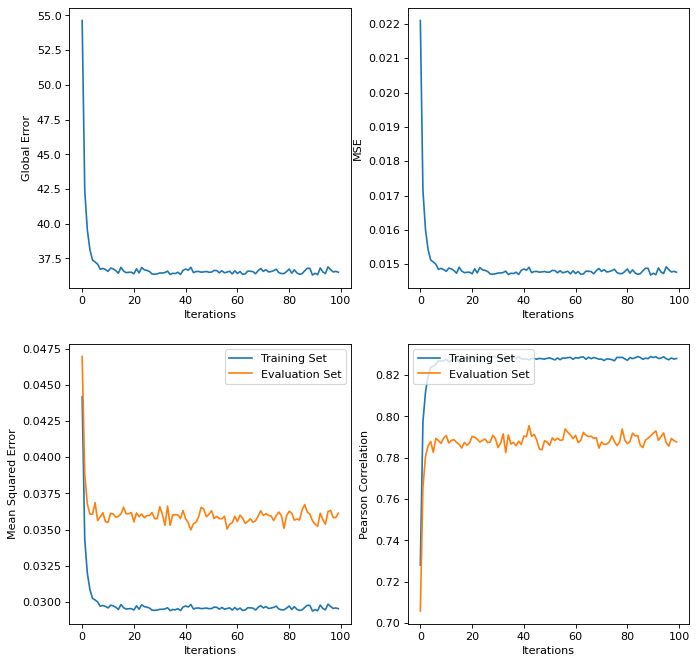

In [118]:
fig = plt.figure(figsize=(10, 10), dpi= 80)

x = np.arange(0, len(gerror_plot))

plt.subplot(2, 2, 1)
plt.plot(x, gerror_plot)
plt.ylabel("Global Error", fontsize=10);
plt.xlabel("Iterations", fontsize=10);

plt.subplot(2, 2, 2)
plt.plot(x, mse_plot)
plt.ylabel("MSE", fontsize=10);
plt.xlabel("Iterations", fontsize=10);


x = np.arange(0, len(train_mse_plot))

plt.subplot(2, 2, 3)
plt.plot(x, train_mse_plot, label="Training Set")
plt.plot(x, eval_mse_plot, label="Evaluation Set")
plt.ylabel("Mean Squared Error", fontsize=10);
plt.xlabel("Iterations", fontsize=10);
plt.legend(loc='upper right');


plt.subplot(2, 2, 4)
plt.plot(x, train_pcc_plot, label="Training Set")
plt.plot(x, eval_pcc_plot, label="Evaluation Set")
plt.ylabel("Pearson Correlation", fontsize=10);
plt.xlabel("Iterations", fontsize=10);
plt.legend(loc='upper left');

## Get PSSM Matrix

### Vector to Matrix

In [119]:
# our matrices are vectors of dictionaries
def vector_to_matrix(vector, alphabet):
    
    rows = int(len(vector)/len(alphabet))
    
    matrix = [0] * rows
    
    offset = 0
    
    for i in range(0, rows):
        
        matrix[i] = {}
        
        for j in range(0, 20):
            
            matrix[i][alphabet[j]] = vector[j+offset] 
        
        offset += len(alphabet)

    return matrix

### Matrix to Psi-Blast

In [120]:
def to_psi_blast(matrix):

    # print to user
    
    header = ["", "A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]

    print('{:>4} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8}'.format(*header)) 

    letter_order = ["A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]

    for i, row in enumerate(matrix):

        scores = []

        scores.append(str(i+1) + " A")

        for letter in letter_order:

            score = row[letter]

            scores.append(round(score, 4))

        print('{:>4} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8} {:>8}'.format(*scores)) 

### Print

In [121]:
matrix = vector_to_matrix(weights, alphabet)
to_psi_blast(matrix)

            A        R        N        D        C        Q        E        G        H        I        L        K        M        F        P        S        T        W        Y        V
 1 A   0.0107   0.0068  -0.0397  -0.2008  -0.0241  -0.0319  -0.1391  -0.0254  -0.0461   0.0084   0.0073   0.0419   0.0881   0.1527  -0.1785  -0.0142  -0.0547   0.0116    0.166   0.0154
 2 A   0.0286  -0.0072  -0.1717  -0.0871  -0.0979   0.0831  -0.0224  -0.0507  -0.0902   0.1325   0.2775   -0.016   0.2841  -0.0009  -0.0634   0.0381   0.0397   0.1019   0.0395   0.0655
 3 A   0.0225  -0.0886  -0.0024   0.0092  -0.0476  -0.0133  -0.0954  -0.0544  -0.0428   0.0647   0.0617   -0.118   0.1784   0.0741  -0.0252   0.0208  -0.0435   0.0663   0.0896  -0.0318
 4 A   0.0307  -0.0452  -0.0053   0.0626   0.0439  -0.0016   0.0592   0.0295   0.0002  -0.0104  -0.0424   0.0188   0.0382   0.0312   0.0168   0.0186   0.0117   0.0429   0.0271  -0.0021
 5 A  -0.0106   -0.005  -0.0204   0.0312   0.0351  -0.0095   0.0197   0.002

## Performance Evaluation

In [122]:
evaluation_peptides = evaluation[:, 0]
evaluation_peptides = np.array(encode(evaluation_peptides, sparse, alphabet))

evaluation_targets = np.array(evaluation[:, 1], dtype=float)

y_pred = []
for i in range(0, len(evaluation_peptides)):
    y_pred.append(np.dot(evaluation_peptides[i].T, weights))

y_pred = np.array(y_pred)

PCC:  0.7875671156771694


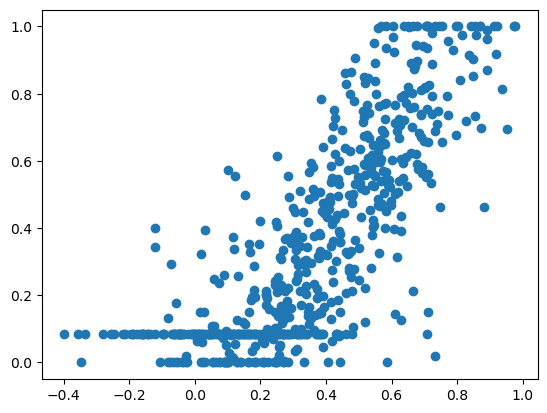

In [123]:
pcc = pearsonr(evaluation_targets, np.array(y_pred))
print("PCC: ", pcc[0])

plt.scatter(y_pred, evaluation_targets);